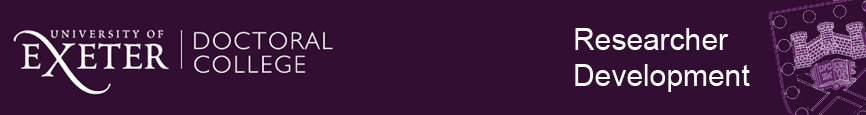

In [1]:
# Ignore this code; it's only here to display the image below
%matplotlib inline
from IPython.display import Image
Image("../images/logo.jpg")

# Python for scientific research
# Data visualisation with `Seaborn`

### John Joseph Valletta
### University of Exeter, Penryn Campus, UK
### June 2017

# Introduction
* `Seaborn` is a library built on top of `Matplotlib` for making attractive and informative statistical graphics
* It supports `Numpy` and `Pandas` data structures

# Data exploratory plots
Let us read in the `wine.csv` data set using `Pandas`. This dataset contains chemical analysis of wines grown in the same region in Italy but from three different cultivars (A, B, C). 

In [2]:
import pandas as pd

df = pd.read_csv("../data/wine.csv", header=0)
df.head()

,WineType,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In the previous practical we've seen how using `Pandas` we can produce exploratory plots. For example, we can create a boxplot for some chemicals of choice.

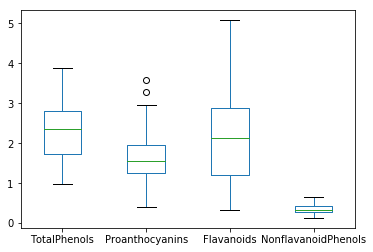

In [3]:
df.plot(y=["TotalPhenols", "Proanthocyanins", "Flavanoids", "NonflavanoidPhenols"], kind="box")

The `Seaborn` package extends the repertoire of plots that we can produce to explore the data. 

## Beeswarm
I'm a fan of these plots as they easily convey information about not only the spread of the data, but its distribution. Beeswarm, violin plots and boxplots should be preferred over simple bar graphs as these do not convey sufficient information about the variability in the underlying data. 

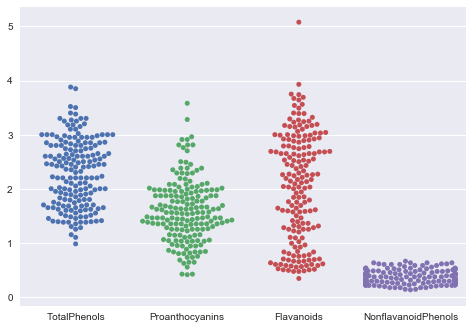

In [4]:
import seaborn as sns

sns.swarmplot(data=df[["TotalPhenols", "Proanthocyanins", "Flavanoids", "NonflavanoidPhenols"]])

## Pairplot
Bivariate relationships across measured variables can reveal interesting structure in the data.

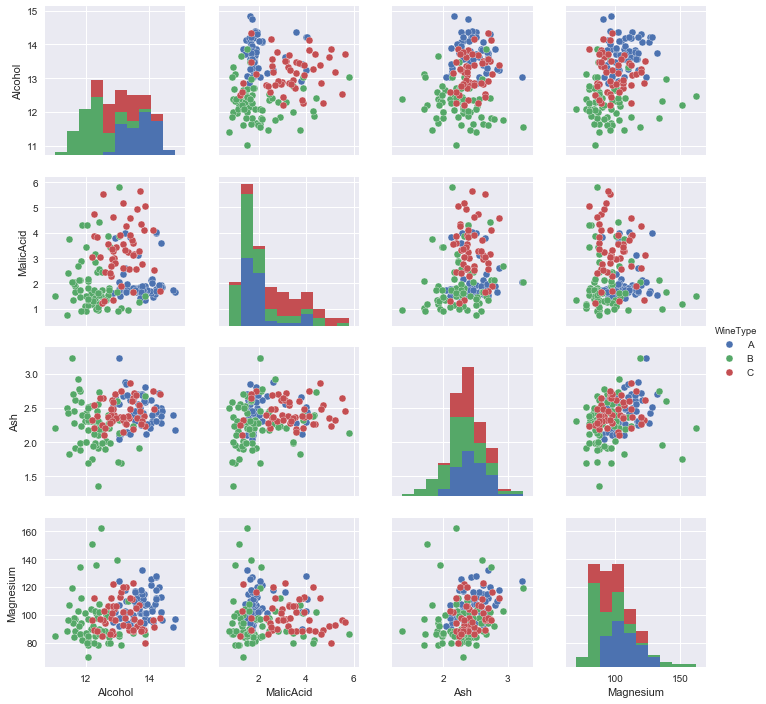

In [5]:
sns.pairplot(df, 
             vars=["Alcohol", "MalicAcid", "Ash", "Magnesium"],
             hue="WineType")

## Jointplot
We can compute correlations across two covariates of interest and visualise the results

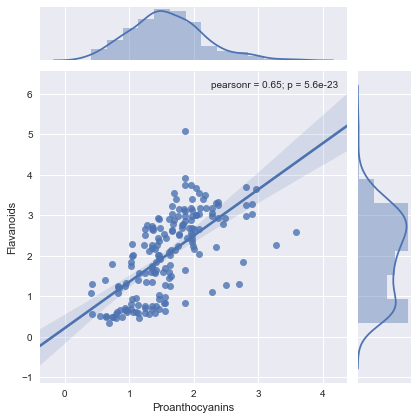

In [6]:
sns.jointplot(x="Proanthocyanins", y="Flavanoids", data=df, kind="reg")

## Clustermap
Heatmaps are popular tools for visualising high-dimensional datasets. They are typically combined with dendrograms (hierarchical clustering) which gives us an indication of which rows/columns are similar to each other.

/Applications/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]

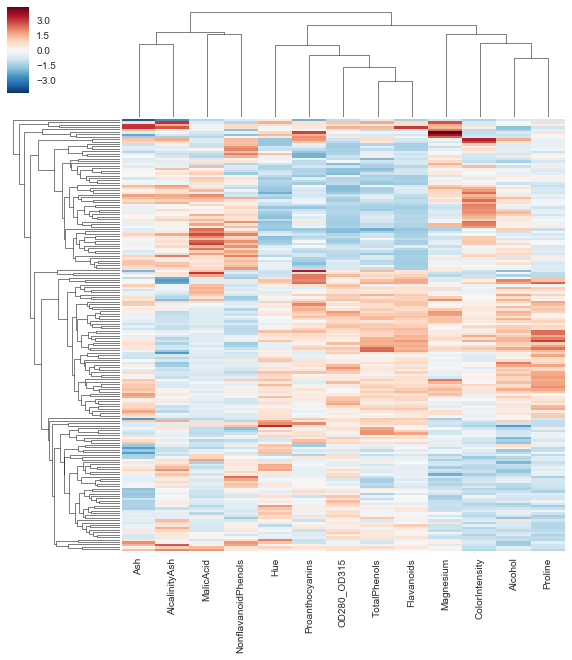

In [7]:
# Remove WineType (we only want a heatmap of numerical variables)
hAx = sns.clustermap(df.drop(["WineType"], axis=1), z_score=1)

# Remove row labels
import matplotlib.pyplot as plt
plt.setp(hAx.ax_heatmap, yticklabels=[])

## Exercise 1
1. Produce a beeswarm plot for four chemicals of choice
2. Create a pairplot for the same four chemicals you have picked in 1.
3. Visualise the relationship between two covariates of choice and display the **spearman** correlation coefficient instead of pearson (**hint**: use the `stat_func` argument). Also change the `kind` argument to obtain different visualisations.
4. Recreate the heatmap above, but now colour each row according to `WineType` (see figure in lecture notes) (**hint**: use the `row_colors` argument)